In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy as np
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.special import gamma as gammaf
from scipy import stats
import seaborn as sns
import pandas as pd
import random
import time
import re

In [2]:
#from data_minion_reads import lire_tailles, lire_taille

def b(x, g, n):
	"""
	fonction loi beta qui correspond à la distribution de la taille des reads
	:param x: taille des reads
	:param g: taille du génome
	:param n: nombre de fragments
	:return: fonction loi beta
	"""
	return  n * (1 - x/g) ** (n - 1)


In [4]:
"""monFichier = open("../Documents/Donnees/SRR6472704.fastq", "r")
id = []
taille = []
norm = []
x=np.linspace(0, 1)
tmp = 0
for line in monFichier:
    fields = line.strip().split()
    for word in fields:
        if word.startswith("length="):
            id.append(word.strip("length="))
id = list(map(int, id))

for i in id:
    if i != tmp:
        taille.append(i)
    tmp = i"""

import json
taille = json.load(open(r"C:\Users\Maman\Documents\stage\reads_seq-master\cache\tailles\DRR034174_subreads.fastq.json"))

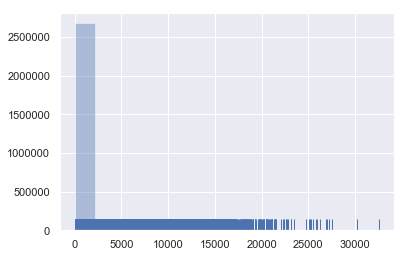

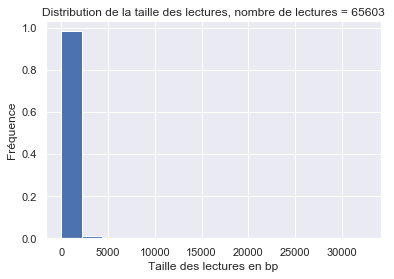

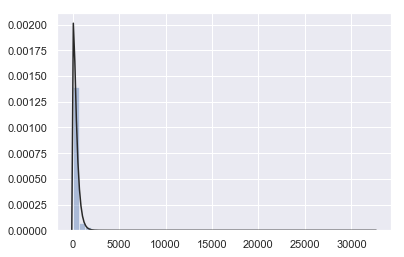

(1.3141009482783117, 343180654.07008207, 10.955566841913537, 95817947215.36453)
2725460


In [6]:

#taille = lire_taille()
sns.set(color_codes=True)
nombre_fragments = len(taille)

axe_abscisse = np.linspace(0, max(taille))
sns.distplot(taille, bins=15, kde=False, rug=True)
plt.show()
weights = np.ones_like(taille) / float(len(taille))
plt.hist(taille, bins=15, weights=weights)
plt.title("Distribution de la taille des lectures, nombre de lectures = 65603")
plt.xlabel("Taille des lectures en bp")
plt.ylabel("Fréquence")
plt.show()
sns.distplot(tuple(taille), kde=False, fit=stats.beta)
plt.show()
print(beta.fit(taille))
print(len(taille))

In [7]:
t = max(taille)
norm = [i / t for i in taille]

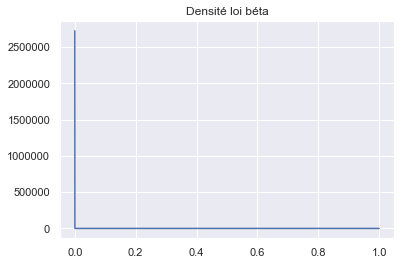

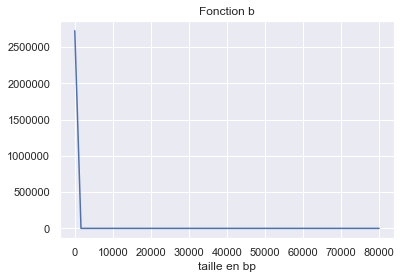

In [8]:
axe_abscisse = np.linspace(0, 1, 10000) # len(set(taille))
plt.title('Densité loi béta')
plt.plot(axe_abscisse, beta.pdf(axe_abscisse, 1, nombre_fragments))

plt.show()

plt.xlabel('taille en bp')
plt.title('Fonction b')

plt.plot(np.linspace(0, 80000), b(np.linspace(0, 80000), 1000000, nombre_fragments, ))

plt.show()


In [9]:
def betaNLL(param, *args):
	"""
	Negative log likelihood function for beta
	<param>: list for parameters to be fitted.
	<args>: 1-element array containing the sample data.
	Return <nll>: negative log-likelihood to be minimized.
	"""

	a, b = param
	data = args[0]
	pdf = beta.pdf(data, a, b, loc=0, scale=1)
	lg = numpy.log(pdf)
	# -----Replace -inf with 0s------
	lg = numpy.where(lg == -numpy.inf, 0, lg)
	print(lg)
	nll = -1 * numpy.sum(lg)
	return nll


mean = np.mean(norm)
var = np.var(norm, ddof=1)
alpha1 = mean ** 2 * (1 - mean) / var - mean
beta1 = alpha1 * (1 - mean) / mean

fitted = lambda x, a, b: gammaf(a + b) / gammaf(a) / gammaf(b) * x ** (a - 1) * (1 - x) ** (b - 1)  # pdf of beta

In [10]:
# ------------------Fit using mle------------------
result = fmin(betaNLL, [1, 1], args=(norm,))
alpha2, beta2 = result

# ----------------Fit using beta.fit----------------

alpha3, beta3, axe_abscisse, yy = beta.fit(norm)

print('\n# alpha,beta from moments:', alpha1, beta1)
print('# alpha,beta from mle:', alpha2, beta2)
print('# alpha,beta from beta.fit:', alpha3, beta3)


[0. 0. 0. ... 0. 0. 0.]
[-0.35087549 -0.35087549 -0.35087549 ...  0.0403159   0.04492676
  0.04879016]
[ 0.04877328  0.04877328  0.04877328 ... -0.04413661 -0.0811528
  0.        ]
[ 0.39553304  0.39553304  0.39553304 ... -0.08856824 -0.13019529
  0.        ]
[ 0.76138846  0.76138846  0.76138846 ... -0.16035915 -0.22510515
  0.        ]
[ 0.80370613  0.80370613  0.80370613 ... -0.21095137 -0.31271356
  0.        ]
[ 1.19030447  1.19030447  1.19030447 ... -0.33168178 -0.48432507
  0.        ]
[ 1.86846673  1.86846673  1.86846673 ... -0.48235725 -0.66273034
  0.        ]
[ 2.71147344  2.71147344  2.71147344 ... -0.76830758 -1.02035913
  0.        ]
[ 3.07127161  3.07127161  3.07127161 ... -1.00874805 -1.34869689
  0.        ]
[ 4.03992728  4.03992728  4.03992728 ... -1.6192284  -2.09677866
  0.        ]
[ 4.95138328  4.95138328  4.95138328 ... -2.66556718 -3.24252569
  0.        ]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[ 3.73708268  3.73708268  3.73708268 ... -1.3218

[   3.52815365    3.52815365    3.52815365 ... -222.73522328 -314.19716917
    0.        ]
[   3.50763988    3.50763988    3.50763988 ... -223.70733623 -315.57409074
    0.        ]
[   3.50467196    3.50467196    3.50467196 ... -223.32298754 -315.0360533
    0.        ]
[   3.51314112    3.51314112    3.51314112 ... -223.51234977 -315.29711321
    0.        ]
[   3.5077821     3.5077821     3.5077821  ... -224.02856681 -316.02511084
    0.        ]
[   3.51169448    3.51169448    3.51169448 ... -223.40048131 -315.14084776
    0.        ]
[   3.50619252    3.50619252    3.50619252 ... -223.59546848 -315.41782599
    0.        ]
[   3.51140434    3.51140434    3.51140434 ... -223.53312908 -315.32729104
    0.        ]
[   3.5154581    3.5154581    3.5154581 ... -223.226275  -314.8940489
    0.       ]
[   3.50959477    3.50959477    3.50959477 ... -223.58707059 -315.40407995
    0.        ]
[   3.50930446    3.50930446    3.50930446 ... -223.71971852 -315.59052339
    0.        ]
[   3.

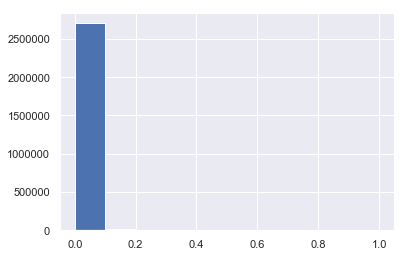

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


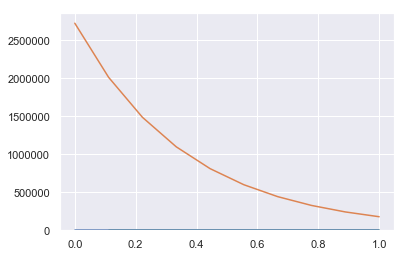

2725460


In [11]:
plt.hist(norm)
plt.show()
axe_abscisse = np.linspace(0, max(norm),10)

plt.plot(axe_abscisse, fitted(axe_abscisse, alpha1, beta1), 'g')
plt.plot(axe_abscisse, fitted(axe_abscisse, alpha2, beta2), 'b')
plt.plot(axe_abscisse, fitted(axe_abscisse, alpha3, beta3), 'r')

weights = np.ones_like(norm) / float(len(norm))
plt.hist(norm, weights=weights)
plt.plot(axe_abscisse, b(axe_abscisse, 1000000, len(taille)))
plt.show()

print(len(taille))
if __name__ == '__main__':
	pass
